# Power Spectral Density - Code

***

A **Stationary Random Process** is introduced and each concept from the Theory book (including **Energy**, **Power** and the **Periodogram** is explored for this process. The **Einstein-Wiener-Khintchine Theorem** allows for an analytic evaluation of the random process. **Stationarity** is also proved while determining **Autocorrelation**.  

**Note**: *This notebook is an implementation of the theory given in [this notebook](Power%20Spectral%20Density%20-%20Theory.ipynb). The sections closely mirror each other.*

Let us consider the following random process

$$
X[n] = A\sin\bigg(\frac{1}{20}n + \phi \bigg)
$$

where $A$ is a standard normal random variable with pdf given by:

$$
P[a<A<a+\delta] = \frac{1}{\sqrt{2 \pi}}e^{\frac{-a^2}{2}}
$$

and $\phi$ be uniformly distributed between $-\pi$ and $\pi$:

$$
f_{\phi}(x) = \Bigg\{ \begin{split}\frac{1}{2\pi}&, x\in[-\pi, \pi]\\0 &, \text{  otherwise}\end{split} \Bigg\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

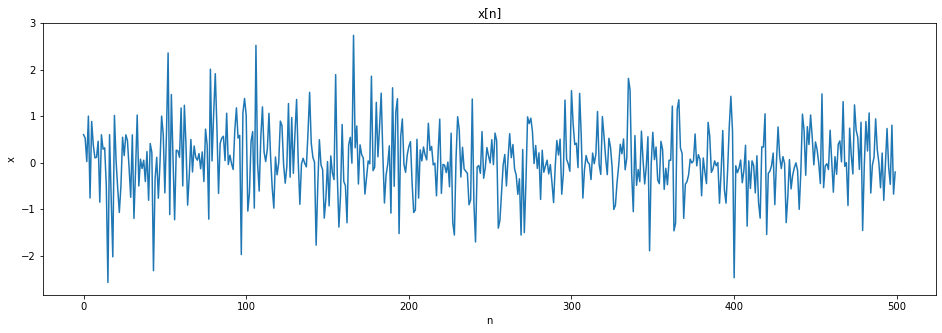

In [2]:
np.random.seed(159)
samples = 500
A = np.random.randn(samples)
phi = np.random.uniform(-np.pi, np.pi, samples)
n = np.arange(0, samples)
x = A*np.sin(n/20 + phi)
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.set_title("x[n]")
ax.set_xlabel("n")
ax.set_ylabel("x")
ax.plot(x);

## Energy and Power

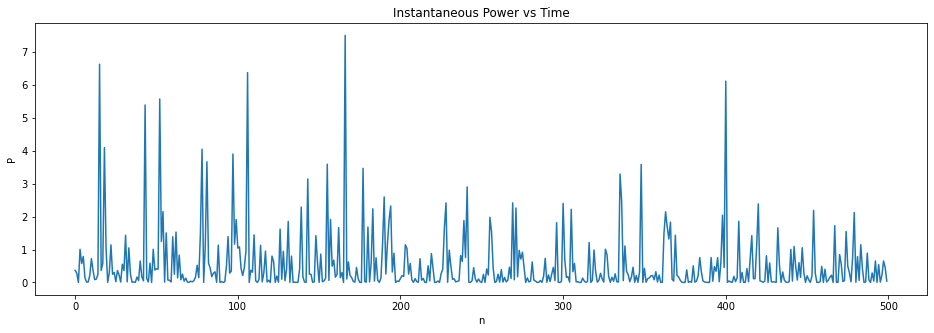

In [3]:
power_inst = x**2

fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.set_title("Instantaneous Power vs Time")
ax.set_xlabel("n")
ax.set_ylabel("P")
ax.plot(power_inst);

## Autocorrelation

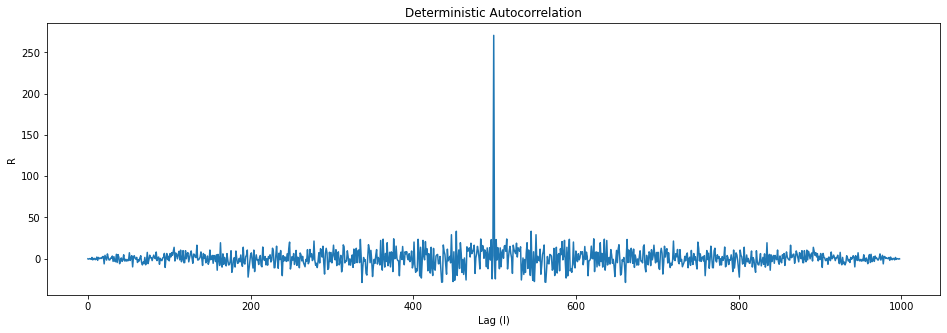

In [4]:
corr_det = np.correlate(x,x, mode='full')

fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.set_title("Deterministic Autocorrelation")
ax.set_xlabel("Lag (l)")
ax.set_ylabel("R")
ax.plot(corr_det);

For the random process, we check that it is wide-sense stationary (WSS) at least and calculate the autocorrelation in the process:

First we check the first order moment.
$$
\begin{split}
\mathbb{E}[X[n]] &= \mathbb{E}\bigg[A \sin\Big(\frac{1}{20}n + \phi\Big)\bigg]\\
&= \mathbb{E}[A]\mathbb{E}\bigg[\sin\Big(\frac{1}{20}n + \phi\Big)\bigg]\\
&= 0
\end{split}
$$

Indeed the first order moment is independent of time.

Now moving on to the second-order moment:
$$
\begin{split}
\mathbb{E}[X[n_1]X[n_2]] &= \mathbb{E}[A^2\sin(kn_1 + \phi)\sin(kn_2 + \phi)]\\
&= \mathbb{E}[A^2]\mathbb{E}[\sin(kn_1 + \phi)\sin(kn_2 + \phi)]\\
&= \frac{1}{2}\mathbb{E}[\cos(k(n_1-n_2))-\cos(k(n_1+n_2)+2\phi)]\\
&= \frac{1}{2}\mathbb{E}[\cos(k(n_1-n_2))]-\mathbb{E}[\cos(k(n_1+n_2)+2\phi)]\\
&= \frac{1}{2}\Big[\cos(k(n_1-n_2)-\mathbb{E}[\cos(k(n_1+n_2)+2\phi)]\Big]\\
&= \frac{1}{2}\cos(k(n_1-n_2))\\
\end{split}
$$

where 
1. The second equality uses that the two expressions in the expectation operators are independent
2. In third equality we have replaced the value for $\mathbb{E}[A^2]$ with its value 1
2. In the third equality we have used $\sin(a)\sin(b) = \frac{1}{2}(\cos(a-b)-\cos(a+b))$
3. The fifth equality follows from the fact that $cos(k(n_1-n_2))$ is a constant 
159. The last equality uses: $\mathbb{E}[\cos(k(n_1+n_2)+2\phi)] = 0$
3. $k = \frac{1}{20}$

Indeed we see that it is WSS and have the autocorrelation function for our random process as well.

The autocorrelation evaluated at a lag of $0$ is:

$$R_X[0] = \frac{1}{2}$$

which gives us the expected instantaneous power

## Einstein-Wiener-Khintchine Theorem

We find the following PSD for our given process:

$$
\begin{split}
S_X(j\omega) &= \frac{1}{2}\sum_{l=-\infty}^{+\infty}\cos\bigg(\frac{l}{20}\bigg)e^{-j\omega l}\\
    &= \frac{\pi}{2} \sum_{l=-\infty}^{+\infty}\delta\Big(\omega - \frac{1}{20} -2\pi l\Big) + \delta\Big(\omega + \frac{1}{20} -2\pi l\Big)
\end{split}
$$

$$
\begin{split}
R_X[l] &= \frac{1}{4}\int_{2 \pi} e^{-j\omega l}\sum_{m=-\infty}^{+\infty}\delta\Big(\omega - \frac{1}{20} -2\pi m\Big) + \delta\Big(\omega + \frac{1}{20} -2\pi m\Big)d\omega\\
\end{split}
$$

Evaluating at $l=0$ we indeed get $\frac{1}{2}$

$$
\begin{split}
R_X[0] &=\frac{1}{4}\int_{2 \pi} \sum_{m=-\infty}^{+\infty}\delta\Big(\omega - \frac{1}{20} -2\pi m\Big) + \delta\Big(\omega + \frac{1}{20} -2\pi m\Big)d\omega\\
&= \frac{1}{2}
\end{split}
$$

where we find this from the fact that there will only be one realization of the delta function in each of the summations within a $2\pi$ interval.

## Parseval's Relation and Periodogram

We take the Fourier Transform of the given signal:

$$
\mathcal{F}\{x([n])\} = X(j\omega)
$$

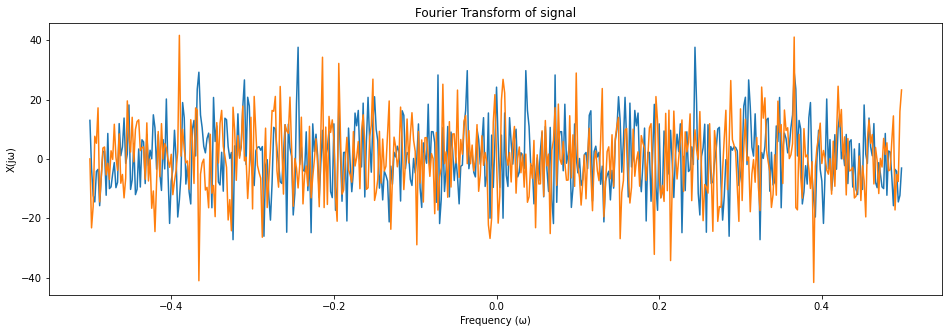

In [5]:
from scipy.fft import fft, fftfreq, fftshift

X = fftshift(fft(x))
omega = fftshift(fftfreq(samples))

fig, axs = plt.subplots(1,1,figsize=(16,5))
axs.set_title("Fourier Transform of signal")
axs.set_xlabel("Frequency (ω)")
axs.set_ylabel("X(jω)")
axs.plot(omega, X.real, label="Re{X}")
axs.plot(omega, X.imag, label="Im{X}");

We find the Energy Density Spectrum:

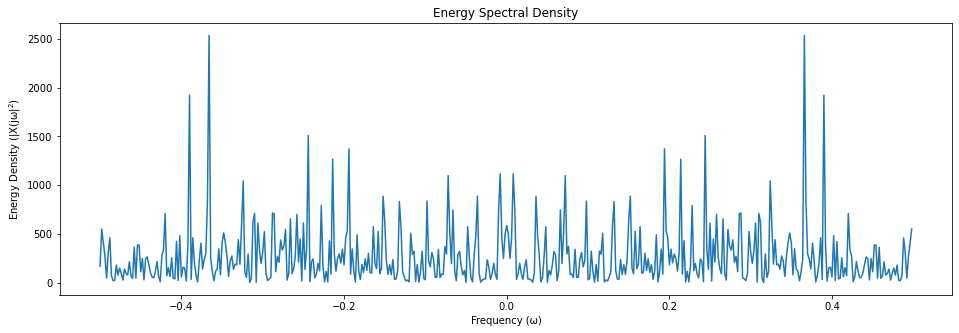

In [6]:
ESD = (X*np.conjugate(X)).real

fig, axs = plt.subplots(1,1, figsize=(16,5))
axs.set_title("Energy Spectral Density")
axs.set_xlabel("Frequency (ω)")
axs.set_ylabel("Energy Density (|X(jω|$^2$)")
axs.plot(omega, ESD);

We also find the Periodogram Estimate:

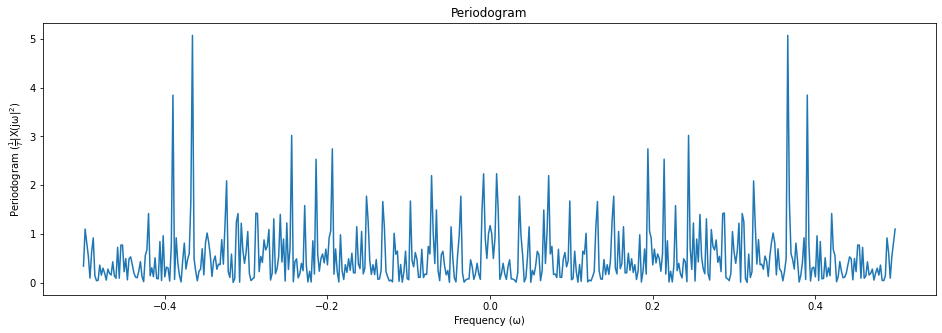

In [7]:
p_tilde = ESD/samples

fig, axs = plt.subplots(1,1, figsize=(16,5))
axs.set_title("Periodogram")
axs.set_xlabel("Frequency (ω)")
axs.set_ylabel("Periodogram ($\\frac{1}{T}$|X(jω|$^2$)")
axs.plot(omega, p_tilde);